
# Author : Richa Shah


#### Data Science and Busines Analytics Intern
#### GRIP : The Sparks Foundation
#### Task 1 : Predictions Using Linear Regression
## What will be the predicted score if a student studies for 9.25 hours?

# Step 1: Reading and Understanding the Data
Let's start with the following steps:



In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Import the matplotlib and seaborn libraries

import matplotlib.pyplot as plt
import seaborn as sns

Importing CSV as dataframe

In [4]:
# Read the given CSV file, and view some sample records

Score= pd.read_csv("http://bit.ly/w-data")
Score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Lets inspect various aspect of our data frame

In [5]:
Score.shape

(25, 2)

In [6]:
Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
Score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000



# Step 2: Visualising the Data

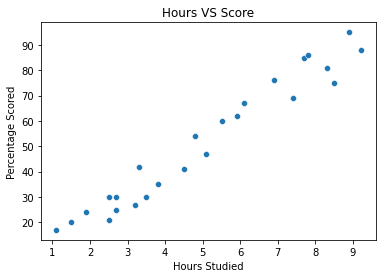

In [8]:
sns.scatterplot(data= Score, x ='Hours', y ='Scores')
plt.title('Hours VS Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

##### Inference : We can clearly see that there is positive linear relation between both the variables

# Step 3: Performing Simple Linear Regression
Generic Steps in model building using statsmodels

In [9]:
X= Score[["Hours"]]
y= Score["Scores"]

## Train-Test Split

split our variable into training and testing sets. Performing this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, test_size= 0.3, random_state= 100)

In [11]:
# Let's now take a look at the train dataset

X_train.head()

,Hours
6,9.2
12,4.5
4,3.5
24,7.8
0,2.5


In [12]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

## Building a Linear Model


In [13]:
#import the linear_model from sklearn

from sklearn.linear_model import LinearRegression

In [14]:
X_train.shape

(17, 1)

In [15]:
# Fit the model using lr.fit()

lr= LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
#find Intercept and Co-eff 

print(lr.intercept_)
print(lr.coef_)

1.495142109236383
[9.87171443]


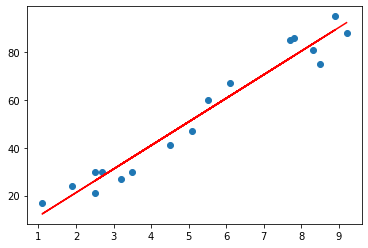

In [17]:
#visualising the best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, lr.intercept_ + lr.coef_*X_train, 'r')
plt.show()

# Step 4: Prediction on test set


In [18]:
y_pred= lr.predict(X_test)

In [19]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


# Step 5: Evaluation of the Model

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [21]:
mean_absolute_error(y_test, y_pred)

4.762517892332275

In [22]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687437

Inferences:
1. Mean absolute error is less than 5%
2. 93.09% of variance is explained

hence it is a good model

# Question

In [23]:
#What will be the predicted score if s student studies for 9.25 hours/day?

hours= [[9.25]]
pred = lr.predict(hours)

In [24]:
print('If student studied for ', hours[0][0],'hours then estimated score will be ', pred[0],'%')


If student studied for  9.25 hours then estimated score will be  92.80850057353504 %
